![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 9 - Statistical Classification</center>
### <center> (Classification) Decision Trees</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/09_StatisticalClassification/MainTree1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

np.random.seed(1)

### Generate some data:

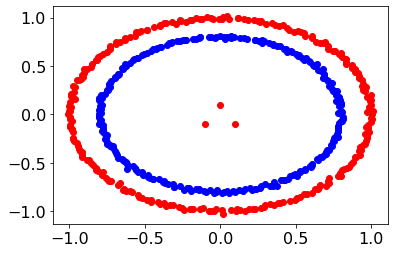

In [2]:
from sklearn import datasets

N           = 500
mX, vY      = datasets.make_circles(n_samples=N, noise=.01)
vY[vY == 0] = -1

mX[0,:] = [0,     0.1]
mX[1,:] = [-0.1, -0.1]
mX[2,:] = [0.1,  -0.1]
vY[:3]  = -1


vIdx0 = vY == -1
vIdx1 = vY == 1
plt.figure()
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color = 'r')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color = 'b')
plt.show()

### Plot tree function:

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def PlotTree(depth):
    TreeMdl        = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    TreeClassifier = TreeMdl.fit(mX, vY)
    v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
    v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
    XX0, XX1 = np.meshgrid(v0, v1)
    XX       = np.c_[XX0.ravel(), XX1.ravel()]

    _, ax = plt.subplots(1, 2, figsize=(20,10))
    Z = TreeClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    ax[0].contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    ax[0].scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    ax[0].scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')

    plot_tree(TreeClassifier, filled=True, ax=ax[1], rounded=True)
    ax[1].set_title('Max depth = ' + str(depth))
    

In [4]:
from ipywidgets import interact, IntSlider, Layout

depthSlider = IntSlider(min=1, max=20, step=1, value=1, layout=Layout(width='80%'))
interact(PlotTree, depth=depthSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='depth', layout=Layout(width='80%'), max=20, min=1), Outp…

### Generate some train and test data (from the same distribution):

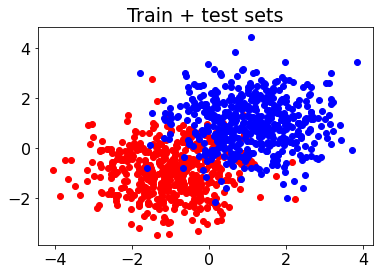

In [5]:
from sklearn.model_selection import train_test_split

N1  = 500
N2  = 500
mX1 = np.random.randn(N1, 2) + 1
mX2 = np.random.randn(N2, 2) - 1
vY1 = np.ones(N1)
vY2 = -np.ones(N2)
mX  = np.r_[mX1, mX2]
vY  = np.r_[vY1, vY2]

vIdx0 = vY == -1
vIdx1 = vY == 1
plt.figure()
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color = 'r')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color = 'b')
plt.title('Train + test sets')
plt.show()

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, test_size=0.5)

### Train decision trees with various depths

In [6]:
lClassifiers = []
for ii in range(1, 26):
    TreeMdl        = DecisionTreeClassifier(criterion='entropy', max_depth=ii)
    TreeClassifier = TreeMdl.fit(mTrainX, vTrainY)
    lClassifiers.append(TreeClassifier)

### Plot function:

In [7]:
vTrainRes = np.array([cls.score(mTrainX, vTrainY) for cls in lClassifiers])
vTestRes  = np.array([cls.score(mTestX,  vTestY)  for cls in lClassifiers])

v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotTree(depth):
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    Z = lClassifiers[depth-1].predict(XX)
    Z = Z.reshape(XX0.shape)

    ax[0].contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    ax[0].scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    ax[0].scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')

    
    ax[1].plot(range(1, depth+1), 1 - vTrainRes[:depth], color='m', lw=2, marker='.', markersize=20, label='Train Error')
    ax[1].plot(range(1, depth+1), 1 - vTestRes[:depth],  color='k', lw=2, marker='.', markersize=20, label='Test Error')
    ax[1].legend()
    ax[1].set_title('Max depth = ' + str(depth))

#### Increasing the depth of a decision tree will cause to overfit

In [8]:
depthSlider = IntSlider(min=1, max=25, step=1, value=1, layout=Layout(width='80%'))
interact(PlotTree, depth=depthSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='depth', layout=Layout(width='80%'), max=25, min=1), Outp…